# Introduction

In this notebook, we will run a Prototypical Network for Few-Shot learning using 3 pre-trained models (VGG19, ResNet50, & DenseNet121) as the feature extractors.

This is also known as **transfer Learning** - We are going to freeze the model parameters so that there are no updates during backpropagation. This means there is no training, we are going to use weights of the pre-trained model on our eye image data and see how well the model does on a dataset it has not seen before. In other words we are going to run the model on our test data, and see how accurate it is.

## 1. Import relevant packages

In [4]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
!pip install torch-summary==1.4.4 # for DenseNet121
from torchsummary import summary

import utilities
import read_data
import prototypical_network
import train_and_evaluation


## 2. Device

In [5]:
# get the computational device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## 3. Get data

We are going to use data in the test set.

In [6]:
%%time
# we want to resize all our images to 224x224
img_height, img_width = 224, 224
data_dir = utilities.test_data_dir
x_test, y_test = read_data.read_eye_images(data_dir, img_height, img_width, augmentation=False)

CPU times: user 387 ms, sys: 98.8 ms, total: 486 ms
Wall time: 28.2 s


In [ ]:
# check the shape of our data
x_test.shape, y_test.shape

((90, 224, 224, 3), (90,))

## 4. Display example images

Before running a model with any data, you should have a visual inspection of the data first.

Class labels sampled: ['trachoma' 'pink_eye' 'strabismus']


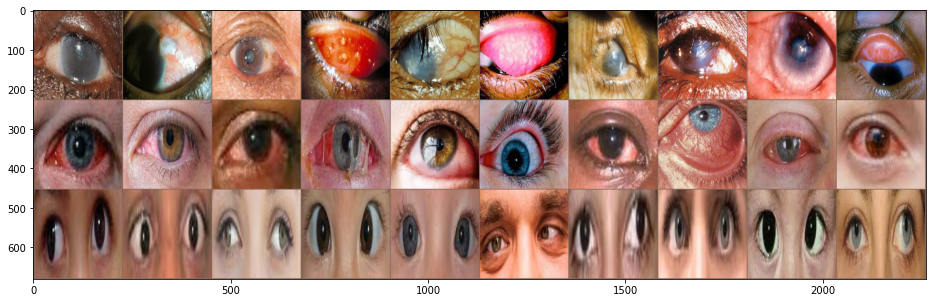

In [ ]:
# As an example, lets pick a sample with the following
n_way = 3     # no. of classes --> Remember due to augmentation we now have 28 classes to sample from
n_support = 5 # no. of support images per class
n_query = 5   # no. of qiery images per class
sample_example = train_and_evaluation.extract_sample(n_way, n_support, n_query, x_test, y_test) #  returns a dictionary
train_and_evaluation.display_sample(sample_example['images'])
print(f"Class labels sampled: {sample_example['class_labels']}")

## 5. Download pretrained model

In [ ]:
################################# VGG19 ##############################################

#vgg19_model = models.vgg19(pretrained=True)

################################# ResNet50 ###########################################

#resnet50_model = models.resnet50(pretrained=True)

################################# DenseNet121 ########################################

densenet121_model = models.densenet121(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


**5a. Model architecture**

In [ ]:
################################# VGG19 ###############################################

#vgg19_model = vgg19_model.to(device)
#print(vgg19_model)

################################ ResNet50 #############################################

#resnet50_model = resnet50_model.to(device)
#print(resnet50_model)

################################ DenseNet121 ##########################################

densenet121_model = densenet121_model.to(device)
print(densenet121_model)

**5b. Summarize model**

Here you get to understand input and output image sizes as the model extracts features from each image. You also find out the number of parameters in your model

In [ ]:
################################# VGG19 ########################################

#summary(vgg19_model, (3, 224, 224), device=device)

################################# ResNet50 #####################################

#summary(resnet50_model, (3, 224, 224), device=device)

################################# DenseNet121 ##################################

# you need torch-summary==1.4.4 to be able to summarize DenseNet121 model
#!pip install torch-summary==1.4.4
summary(densenet121_model, (3, 224, 244), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 122]        9,408
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 122]        128
|    └─ReLU: 2-3                         [-1, 64, 112, 122]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 61]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 61]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 61]          45,440
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 61]          49,600
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 61]          53,760
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 61]          57,920
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 61]          62,080
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 61]          66,240
|    └─_Transition: 2-6                  [-1, 128, 28, 30

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 122]        9,408
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 122]        128
|    └─ReLU: 2-3                         [-1, 64, 112, 122]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 61]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 61]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 61]          45,440
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 61]          49,600
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 61]          53,760
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 61]          57,920
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 61]          62,080
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 61]          66,240
|    └─_Transition: 2-6                  [-1, 128, 28, 30

**5c. Freeze the model**

This stops any parameter updates during backpropagation

In [ ]:
#################################### VGG19 ############################################

#for param in vgg19_model.parameters():
  #param.requires_grad = False

#################################### ResNet50 #########################################

#for param in resnet50_model.parameters():
  #param.requires_grad = False

################################### DenseNet121 #########################################

for param in densenet121_model.parameters():
  param.requires_grad = False

**5d. Flatten outputs from the Convolutional base networks and remove the Linear layers**

In [ ]:
###################################### VGG19 ##########################################

#vgg19_model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
#vgg19_model.classifier = nn.Flatten()
#summary(vgg19_model, (3, 224, 224), device=device)

####################################### ResNet50 ######################################

#resnet50_model.fc = nn.Flatten()
#summary(resnet50_model, (3, 224, 224), device=device)

###################################### DenseNet121 ####################################

densenet121_model.classifier = nn.Flatten()
summary(densenet121_model, (3, 224, 224), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 7, 7]          --
|    └─Conv2d: 2-1                       [-1, 64, 112, 112]        (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 112, 112]        (128)
|    └─ReLU: 2-3                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-4                    [-1, 64, 56, 56]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 56, 56]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 56, 56]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 56, 56]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 56, 56]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 56, 56]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 56, 56]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 56, 56]          (66,240)
|    └─_Transition: 2-6                  

## 6. Test the accuracy of your model

In [ ]:
# Lets test our Prototypical Network Model 

prototypical_model = prototypical_network.ProtoNet(densenet121_model, device)
prototypical_model.to(device)

n_way = 3
n_support = 5
n_query = 10

test_episodes = 5000


test_loss, test_accuracy = train_and_evaluation.test_model_one_one_task(prototypical_model, n_way, n_support, n_query, test_episodes, x_test, y_test)

# display the test results
print(f"Average Test Loss: {test_loss:.3f}")
print(f"Average Test Accuracy: {test_accuracy * 100:.2f}%")

Test loss and accuracy every 100 episodes: 
Episode: 0 ---> Loss: 20.980, Accuracy: 0.90
Episode: 100 ---> Loss: 1.977, Accuracy: 0.93
Episode: 200 ---> Loss: 11.322, Accuracy: 0.93
Episode: 300 ---> Loss: 5.724, Accuracy: 0.97
Episode: 400 ---> Loss: 4.692, Accuracy: 0.83
Episode: 500 ---> Loss: 2.978, Accuracy: 0.93
Episode: 600 ---> Loss: 0.543, Accuracy: 0.97
Episode: 700 ---> Loss: 1.381, Accuracy: 0.93
Episode: 800 ---> Loss: 5.519, Accuracy: 0.93
Episode: 900 ---> Loss: 7.591, Accuracy: 0.83
Episode: 1000 ---> Loss: 11.038, Accuracy: 0.87
Episode: 1100 ---> Loss: 4.234, Accuracy: 0.97
Episode: 1200 ---> Loss: 15.906, Accuracy: 0.80
Episode: 1300 ---> Loss: 21.204, Accuracy: 0.77
Episode: 1400 ---> Loss: 2.773, Accuracy: 0.93
Episode: 1500 ---> Loss: 2.585, Accuracy: 0.93
Episode: 1600 ---> Loss: 3.696, Accuracy: 0.90
Episode: 1700 ---> Loss: 3.152, Accuracy: 0.97
Episode: 1800 ---> Loss: 10.597, Accuracy: 0.90
Episode: 1900 ---> Loss: 0.726, Accuracy: 0.97
Episode: 2000 ---> Los

## 7. Make predictions

Class labels sampled: ['strabismus' 'pink_eye' 'trachoma']
{'loss': 0.9447246789932251, 'acc': 0.9333333969116211, 'y_hat': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 2, 2, 2, 2, 2, 2, 2, 2]], device='cuda:0')}


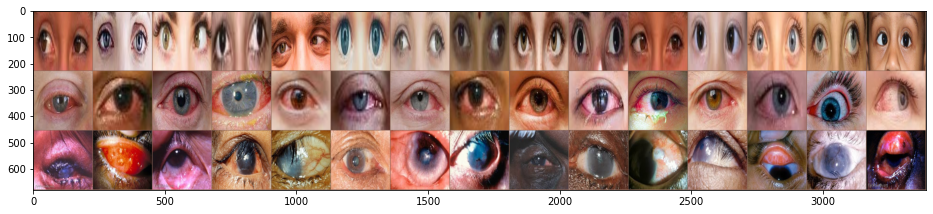

In [ ]:
# Lets ask our model to predict on (n_query) tasks

prototypical_model.to(device)
n_way = 3
n_support = 5
n_query = 10 

sample_images = train_and_evaluation.extract_sample(n_way, n_support, n_query, x_test, y_test)

results = train_and_evaluation.predict(prototypical_model, sample_images, device)

# display the sample images used
train_and_evaluation.display_sample(sample_images["images"])

print(f"Class labels sampled: {sample_images['class_labels']}")


# display the test results
print(results)
 